In [19]:
# Import the libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = "/content/drive/MyDrive/2024 QS World University Rankings.csv"
Ranking = pd.read_csv(file_path, header=1)
Ranking.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100.0,4,95.2,51,100
1,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100.0,6,97.3,33,99.2
2,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100.0,3,97.8,26,98.9
3,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100.0,1,96.7,39,98.3
4,5,3,Stanford University,US,United States,L,FC,VH,5,B,...,78,51.2,284,95.8,44,100.0,2,94.4,63,98.1


In [10]:
Ranking.dtypes

,0
Unnamed: 0,int64
rank display2,int64
institution,object
location code,object
location,object
size,object
focus,object
research,object
age band,int64
status,object


In [11]:
Ranking.shape

(1497, 29)

In [12]:
Ranking.columns.values[0] = 'rank_2024'
Ranking.columns.values[1] = 'rank_2023'

In [15]:
# Select top 500
Ranking=Ranking.iloc[:500,:]
Ranking.shape

(500, 29)

In [24]:
Ranking.columns = Ranking.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)

In [25]:
# Describe the data
Ranking.describe()

,rank_2024,rank_2023,age_band,0,ar_rank,er_score,er_rank,fsr_score,fsr_rank,cpf_score,...,ifr_score,ifr_rank,isr_score,isr_rank,irn_score,irn_rank,ger_score,ger_rank,sus_score,sus_rank
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,268.130000,4.302000,42.084800,281.080000,39.731400,324.348000,41.055800,440.56200,50.052400,...,52.886000,381.800000,43.229600,399.366000,52.114200,328.912000,34.444600,359.322000,54.713800,309.14600
std,144.481833,186.040025,0.921137,26.730371,184.184847,29.281887,207.848563,31.710949,251.48271,30.269422,...,36.707094,238.321939,34.149524,237.459424,32.063192,225.980634,26.279842,236.834422,31.504009,215.78594
min,1.000000,1.000000,1.000000,2.800000,1.000000,1.600000,1.000000,1.700000,3.00000,1.200000,...,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.00000
25%,125.750000,125.000000,4.000000,20.475000,125.750000,14.975000,131.750000,12.800000,202.75000,24.125000,...,16.300000,164.750000,13.050000,179.500000,23.275000,132.750000,14.275000,150.500000,27.600000,126.00000
50%,250.500000,250.500000,5.000000,34.350000,251.500000,31.800000,309.500000,32.800000,483.50000,48.700000,...,52.500000,348.500000,33.250000,391.000000,55.000000,283.500000,24.950000,331.000000,56.500000,268.00000
75%,375.250000,380.500000,5.000000,59.175000,425.750000,60.250000,547.500000,66.125000,701.00000,74.450000,...,92.925000,646.500000,76.300000,661.500000,82.200000,516.250000,46.475000,591.500000,83.700000,471.00000
max,500.000000,1463.000000,5.000000,100.000000,601.000000,100.000000,601.000000,100.000000,701.00000,100.000000,...,100.000000,701.000000,100.000000,701.000000,100.000000,701.000000,100.000000,701.000000,100.000000,701.00000


In [27]:
Rank100=Ranking.iloc[:100,:].groupby(['location','location_code'])['institution'].count().reset_index().sort_values('institution',ascending=False)
Rank100

,location,location_code,institution
22,United States,US,27
21,United Kingdom,UK,16
1,Australia,AU,9
17,South Korea,KR,5
8,Hong Kong SAR,HK,5
5,China (Mainland),CN,5
6,France,FR,4
10,Japan,JP,4
7,Germany,DE,4
19,Switzerland,CH,3


In [28]:
Ranking.dtypes

,0
rank_2024,int64
rank_2023,int64
institution,object
location_code,object
location,object
size,object
focus,object
research,object
age_band,int64
status,object


In [30]:
Ranking['overall_score'] = pd.to_numeric(Ranking['overall_score'], errors='coerce')

##Case 1: Chiến lược nâng hạng
**Mục tiêu:** Xác định các yếu tố ảnh hưởng mạnh nhất đến Overall Score để trường có thể cải thiện thứ hạng.

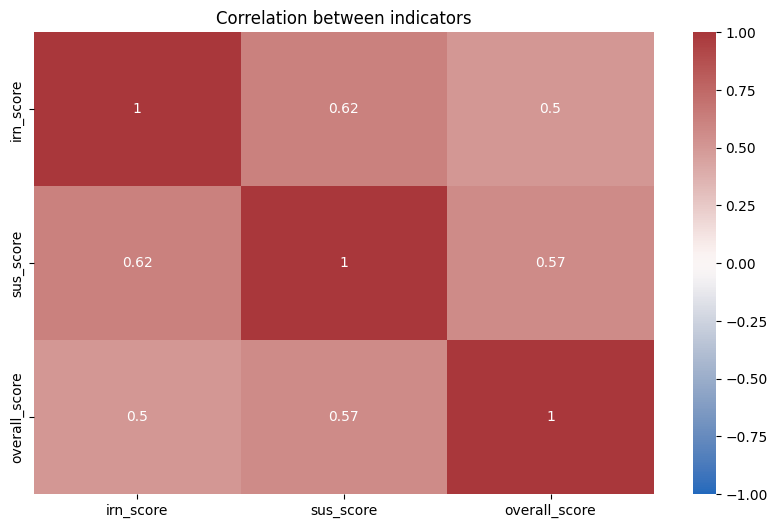

In [38]:
# Chọn các indicator
indicators = ['academic_reputation_score', 'employer_reputation_score', 'citations_per_faculty_score',
              'faculty_student_ratio_score','international_students_score','international_faculty_score',
              'irn_score','sus_score','overall_score']
indicators = [c for c in indicators if c in Ranking.columns]

# Correlation
corr_matrix = Ranking[indicators].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.title("Correlation between indicators")
plt.show()

# Top 3 yếu tố
corr_overall = corr_matrix['overall_score'].drop('overall_score').sort_values(ascending=False)

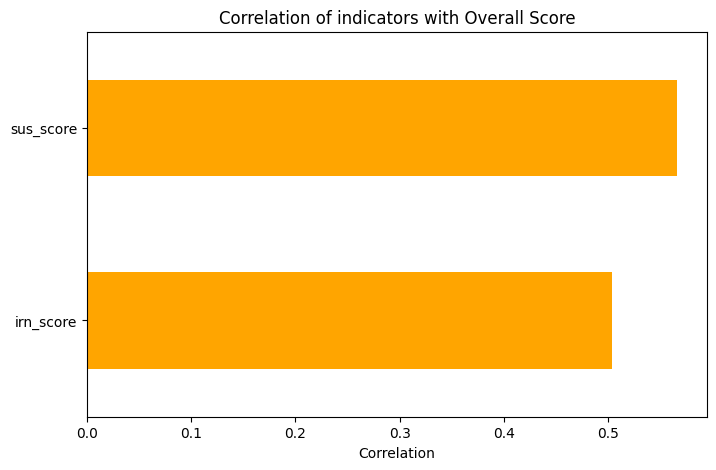

In [39]:
# Bar chart correlation
corr_overall.sort_values(ascending=True).plot(kind='barh', figsize=(8,5),
    color=['orange' if x in corr_overall.head(3).index else 'skyblue' for x in corr_overall.index])
plt.title("Correlation of indicators with Overall Score")
plt.xlabel("Correlation")
plt.show()

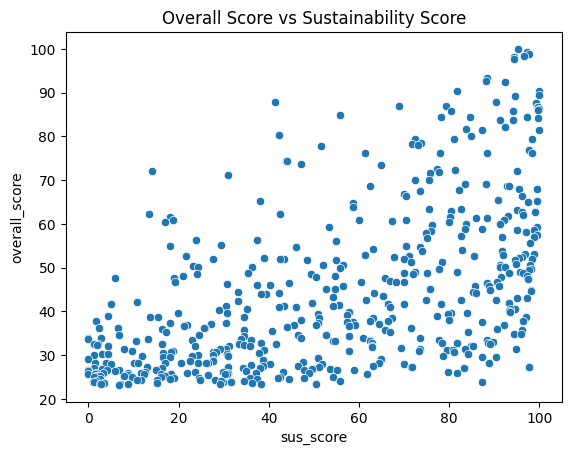

In [40]:
sns.scatterplot(data=Ranking, x='sus_score', y='overall_score')
plt.title("Overall Score vs Sustainability Score")
plt.show()

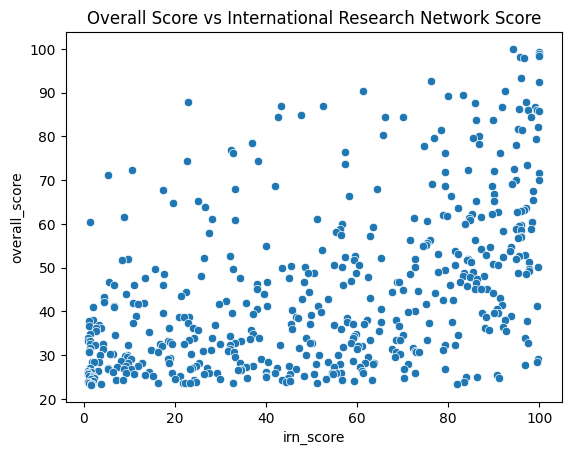

In [41]:
sns.scatterplot(data=Ranking, x='irn_score', y='overall_score')
plt.title("Overall Score vs International Research Network Score")
plt.show()

**Insight Case 1 – Chiến lược nâng hạng**

- 3 yếu tố quan trọng nhất: Sustainability (SUS), International Research Network (IRN) và yếu tố thứ 3 nếu có.
- Trường muốn nâng hạng nên tập trung vào bền vững (green initiatives) và phát triển mạng lưới nghiên cứu quốc tế.

##Case 2: Sinh viên quốc tế chọn trường
**Mục tiêu:** Giúp sinh viên quốc tế chọn trường cân bằng giữa Overall Score, International Students Score và Sustainability Score.


In [46]:
# Drop missing data
df_case2 = Ranking.dropna(subset=['overall_score','isr_score','sus_score'])

# Tạo composite score
df_case2['composite_score'] = (
    df_case2['overall_score']*0.5 +
    df_case2['isr_score']*0.3 +
    df_case2['sus_score']*0.2
)

# Top 20 trường
top20_intl = df_case2.sort_values('composite_score', ascending=False).head(20)
top20_intl[['institution','location','overall_score','isr_score','sus_score','composite_score']]

,institution,location,overall_score,isr_score,sus_score,composite_score
2,University of Oxford,United Kingdom,98.9,98.2,97.8,98.47
1,University of Cambridge,United Kingdom,99.2,95.8,97.3,97.80
5,Imperial College London,United Kingdom,97.8,100.0,94.4,97.78
0,Massachusetts Institute of Technology (MIT),United States,100.0,88.2,95.2,95.50
8,UCL,United Kingdom,92.4,100.0,92.5,94.70
6,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,93.3,98.5,88.4,93.88
19,The University of Sydney,Australia,86.7,100.0,99.7,93.29
18,The University of New South Wales (UNSW Sydney),Australia,86.7,99.1,99.6,93.00
21,The University of Edinburgh,United Kingdom,86.1,99.9,99.7,92.96
20,University of Toronto,Canada,86.3,96.4,99.9,92.05


In [48]:
# Bubble chart
fig = px.scatter(
    top20_intl,
    x='overall_score', y='isr_score',
    size='sus_score', color='location',
    hover_name='institution',
    title='Top 20 Recommended Universities for International Students',
    size_max=40
)
fig.show()

**Insight Case 2 – Sinh viên quốc tế**

- Sinh viên nên cân nhắc các trường không chỉ có Overall Score cao mà còn đa dạng quốc tế và có xu hướng bền vững.
- Bubble chart trực quan giúp dễ lựa chọn dựa trên 3 chỉ số quan trọng.

##Case 3: Phân tích quốc gia & gợi ý chính sách
**Mục tiêu:** Phân tích các quốc gia có lợi thế, đánh giá điểm mạnh/yếu để gợi ý cải thiện chính sách giáo dục.

In [54]:
# Aggregate theo country
country_agg = Ranking.groupby('location').agg(
    avg_overall=('overall_score','mean'),
    avg_sus=('sus_score','mean'),
    avg_irn=('irn_score','mean'),
    num_universities=('institution','count')
).reset_index()

# Top 10 country theo số trường
top10_country = country_agg.sort_values('num_universities', ascending=False).head(10)
top10_country

,location,avg_overall,avg_sus,avg_irn,num_universities
58,United States,51.028049,69.786585,59.801220,82
57,United Kingdom,52.775000,73.700000,69.852083,48
18,Germany,40.896667,40.430000,69.010000,30
9,China (Mainland),41.241379,27.486207,25.424138,29
1,Australia,51.092593,73.925926,65.618519,27
7,Canada,47.552632,80.747368,54.836842,19
17,France,43.987500,42.881250,69.331250,16
27,Japan,47.180000,45.000000,25.206667,15
49,South Korea,46.571429,25.885714,12.250000,14
26,Italy,35.785714,58.564286,67.635714,14


In [57]:
# Bar chart số trường
fig = px.bar(top10_country, x='location', y='num_universities', text='num_universities',
             title='Top 10 Countries by Number of Universities')
fig.show()

# Scatter IRN vs SUS
fig2 = px.scatter(top10_country, x='avg_irn', y='avg_sus', size='avg_overall', color='location',
                  hover_name='location', title='Country Analysis: Internation Students Score vs Sustainability')
fig2.show()

**Insight Case 3 – Quốc gia & chính sách**

- Quốc gia nhiều trường top có lợi thế về brand/funding.
- Scatter IRN vs SUS cho thấy điểm mạnh/yếu từng quốc gia, giúp gợi ý chiến lược cải thiện.

#Tổng kết 3 Case Study

1. **Chiến lược nâng hạng:** Tập trung cải thiện Sustainability và International Research Network.
2. **Sinh viên quốc tế:** Chọn trường dựa trên Overall Score + International Students + Sustainability.
3. **Quốc gia & chính sách:** Xác định điểm mạnh/yếu theo quốc gia, gợi ý chiến lược đầu tư cho giáo dục.